In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import io
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error

# scaled data

In [ ]:
'upload file from pc'
uploaded = files.upload()
scaled_data_X = pd.read_csv(io.BytesIO(uploaded['scaled_data.csv']))


Saving scaled_data.csv to scaled_data.csv


In [ ]:
scaled_data_X = pd.read_csv(io.BytesIO(uploaded['scaled_data.csv']))

In [ ]:
scaled_data_X=scaled_data_X.drop(['Unnamed: 0'],axis=1)

In [ ]:
uploaded = files.upload()
scaled_data_Y = pd.read_csv(io.BytesIO(uploaded['Domestic Gross.csv']))


Saving Domestic Gross.csv to Domestic Gross.csv


In [ ]:
scaled_data_Y=scaled_data_Y.drop(['Unnamed: 0'],axis=1)

In [ ]:
list(meta.isnull().any())# check if we have nan cell, all element is false so we dont have nan

In [ ]:
list(Y.isnull().any())# check if we have nan cell, all element is false so we dont have nan

[False, False]

In [ ]:
scaled_data_X

,Year,Budget,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,genre Drama,genre Romance,genre Thriller,genre Mystery,genre Crime,genre Sport,genre Musical,genre Documentary,genre History,genre Music,genre Biography,genre Horror,genre War,genre Western,genre Short,genre News,genre Film-Noir,genre Reality-TV,genre Adult,MPAA PG-13,MPAA PG,MPAA R,MPAA G,MPAA Unrated,MPAA NC-17,MPAA Not Rated,MPAA M/PG,MPAA TV-PG,Day,...,country Belarus,country Latvia,country Jamaica,country Bangladesh,country Macao,country Morocco,country Ecuador,country Laos,country Greenland,country Paraguay,country Mali,country Papua New Guinea,country Mauritania,country Panama,country Cyprus,country Montenegro,country Malawi,country Sierra Leone,country Liberia,country Mongolia,country North Korea,country Vanuatu,country Uruguay,country Congo,country Kazakhstan,country Myanmar,country Kosovo,country Iraq,country Bahrain,country Zimbabwe,country Syria,country Holy See (Vatican City State),country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank
0,0.0,0.966345,0.730525,0.194514,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25
1,0.0,0.952305,0.852456,0.120948,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.566667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.25
2,0.0,0.952305,0.788950,0.127182,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.133333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
3,0.0,0.952305,0.926969,0.147132,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.200000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.25
4,0.0,0.863070,0.945597,0.147132,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091,1.0,0.780301,0.000000,0.063591,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
7092,1.0,0.780301,0.000000,0.091022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00
7093,1.0,0.780301,0.000000,0.1

In [ ]:
scaled_data_Y

,Domestic Gross ($)
0,20.435272
1,19.843801
2,19.627224
3,19.559902
4,19.521064
...,...
7091,7.149132
7092,8.328451
7093,6.672033
7094,7.459915


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(scaled_data_X, scaled_data_Y, random_state = 0, shuffle=True)

In [ ]:
a=scaled_data_X.iloc[:,0]==1
ind_list=[i for i, x in enumerate(a) if x]


In [ ]:
scaled_data_Y[ind_list]

KeyError: ignored

In [ ]:
# 2019 Y data choose as test samples other as train 
Y_train=[i for i in scaled_data_Y[ind_list]]
Y_test=[i for i in scaled_data_Y[:ind_list[0]-1]]

KeyError: ignored

# unscaled data

In [11]:
'upload file from pc'
uploaded = files.upload()
unscaled_data = pd.read_csv(io.BytesIO(uploaded['final data fill nan .csv']))

Saving final data fill nan .csv to final data fill nan .csv


In [ ]:
unscaled_data = pd.read_csv('final data fill nan .csv')

In [ ]:
unscaled_data=unscaled_data.drop(['Unnamed: 0'],axis=1)
unscaled_data

,Year,Budget,Opening Theaters,Running time (min),genre Action,genre Adventure,genre Fantasy,genre Sci-Fi,genre Animation,genre Comedy,genre Family,genre Drama,genre Romance,genre Thriller,genre Mystery,genre Crime,genre Sport,genre Musical,genre Documentary,genre History,genre Music,genre Biography,genre Horror,genre War,genre Western,genre Short,genre News,genre Film-Noir,genre Reality-TV,genre Adult,MPAA PG-13,MPAA PG,MPAA R,MPAA G,MPAA Unrated,MPAA NC-17,MPAA Not Rated,MPAA M/PG,MPAA TV-PG,Day,...,country Jamaica,country Bangladesh,country Macao,country Morocco,country Ecuador,country Laos,country Greenland,country Paraguay,country Mali,country Papua New Guinea,country Mauritania,country Panama,country Cyprus,country Montenegro,country Malawi,country Sierra Leone,country Liberia,country Mongolia,country North Korea,country Vanuatu,country Uruguay,country Congo,country Kazakhstan,country Myanmar,country Kosovo,country Iraq,country Bahrain,country Zimbabwe,country Syria,country Holy See (Vatican City State),country Zambia,country Swaziland,country Republic of North Macedonia,country Reunion,Producer(s) rank,Director(s) rank,Writer(s) rank,Stars rank,Distributor rank,Domestic Gross ($)
0,2011.0,19.283571,3452.0,162.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,20.435272
1,2011.0,19.113828,4028.0,103.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,19.843801
2,2011.0,19.113828,3728.0,108.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.627224
3,2011.0,19.113828,4380.0,124.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,19.559902
4,2011.0,18.035018,4468.0,124.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.521064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7091,2019.0,17.034386,1.0,57.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.149132
7092,2019.0,17.034386,1.0,79.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.328451
7093,2019.0,17.034386,1.0,104.0,0.0,0.0,0.0,0

In [ ]:
unscaled_data_X=unscaled_data.iloc[:,:276]
unscaled_data_Y=unscaled_data.iloc[:,-1]
# X_train, X_test, Y_train, Y_test = train_test_split(unscaled_data_X,unscaled_data_Y, random_state = 0, shuffle=False)

In [ ]:
a=unscaled_data_X.iloc[:,0]==2019
ind_list=[i for i, unscaled_data_X in enumerate(a) if unscaled_data_X]
test_size=len(ind_list)

In [ ]:
# 2019 Y data choose as test samples other as train 
# Y_train=[i for i in Y[ind_list]]
# Y_test=[i for i in Y[:ind_list[0]-1]]


NameError: ignored

# PCA

 
*   read data from file
*   apply PCA (so we have 5 componenet)
*   seprate 2019 data as test




In [17]:
unscaled_data = pd.read_csv('final data fill nan .csv')
unscaled_data=unscaled_data.drop(['Unnamed: 0'],axis=1)
unscaled_data_X=unscaled_data.iloc[:,:276]
unscaled_data_Y=unscaled_data.iloc[:,-1]

In [18]:
from sklearn.decomposition import PCA

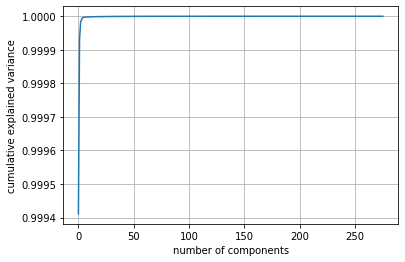

In [19]:
pca = PCA().fit(unscaled_data_X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.grid()

plt.show()

In [20]:
# pca.explained_variance_ratio_

In [21]:
pca = PCA(n_components = 5)
principalComponents = pca.fit_transform(unscaled_data_X)
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4
0,2867.194236,50.831437,1.992957,-5.347069,3.481860
1,3443.068313,-9.418028,1.836468,0.326229,3.650844
2,3143.077045,-3.777739,-11.060864,3.484456,3.967227
3,3795.109765,10.861143,-9.174791,1.574731,3.845897
4,3883.113445,10.637606,13.796744,0.334227,3.647498
...,...,...,...,...,...
7091,-584.023836,-46.887700,-14.499834,3.812596,-3.947041
7092,-583.975377,-24.859228,-2.559708,-5.173353,-4.637612
7093,-583.921736,0.064202,2.617278,5.864927,-3.699278
7094,-583.907805,6.091247,10.560643,-0.161396,-4.184573


In [22]:
# X=principalDf
# X_train, X_test, Y_train, Y_test = train_test_split(X, unscaled_data_Y, random_state = 0, shuffle=True)

In [23]:
a=unscaled_data_X.iloc[:,0]==2019
ind_list=[i for i, unscaled_data_X in enumerate(a) if unscaled_data_X]
# print(ind_list)
X=principalDf
# 2019 Y data choose as test samples other as train 
Y_train=[i for i in unscaled_data_Y[ind_list]]
Y_test=[i for i in unscaled_data_Y[:ind_list[0]-1]]
X_train, X_test, Y_train, Y_test = train_test_split(X, unscaled_data_Y,train_size=len(unscaled_data_Y)-len(ind_list),test_size=len(ind_list), shuffle=False)

from sklearn.utils import shuffle
X_train = shuffle(X_train)
X_test = shuffle(X_test)
Y_train = shuffle(Y_train)
Y_test = shuffle(Y_test)


# linear regression

In [ ]:
%%time
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, Y_train)# fit train data
score=reg.score(X_test,Y_test)
print('score=',score)
coef=reg.coef_
# print('coef=',coef)
predict= reg.predict(X_test)


score= 0.3614230376632916
[[-10062218.77546772]
 [ 64189139.11848504]
 [ 34529839.66837748]
 ...
 [ 50757987.43557004]
 [ -2189092.76742163]
 [-44539060.03724079]]


In [ ]:
from sklearn.model_selection import validation_curve
ns_list=[500,800,1500,2000,2500,3000,4000,5000]
train_scores, valid_scores = validation_curve(LinearRegression(), X_test, Y_test)
train_scores_mean = - np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt_title = 'Validation curve for regression with linear regression'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(ns_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(ns_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

TypeError: ignored



# polynomial regression

In [ ]:
%%time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
degrees = np.arange(1, 20)
polyreg=make_pipeline(PolynomialFeatures(),LinearRegression())
polyreg.fit(X_train,Y_train)
polyreg.predict(X_test)

CPU times: user 12.7 ms, sys: 7.95 ms, total: 20.7 ms
Wall time: 16.7 ms


plot validation curve


1.   loss score vs degrees
2.   loss score vs #sample



In [ ]:

from sklearn.model_selection import validation_curve
train_scores, valid_scores = validation_curve(polyreg, X_test, Y_test,param_name='polynomialfeatures__degree',
                 param_range=degrees)
train_scores_mean = - np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)



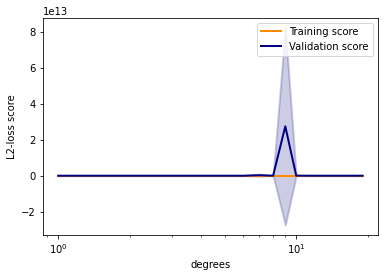

In [ ]:
plt_title = '   Validation curve for regression with polynomial regression'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel='degrees', ylabel='L2-loss score', title=plt_title)
plt.semilogx(degrees, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(degrees, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(degrees, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(degrees, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.model_selection import validation_curve
ns_list=[500,800,1500,2000,2500,3000,4000,5000]
train_scores, valid_scores = validation_curve(polyreg, X_test, Y_test)

train_scores_mean = - np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

plt_title = 'Validation curve for regression with polynomial regression'#.format(k)

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
plt.semilogx(ns_list, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(ns_list, valid_scores_mean, label="Validation score",
             color="navy", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

# SVR

In [25]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np


***polynomial SVR***

In [ ]:
#fit data
%%time

svr_poly = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )
regr = make_pipeline( svr_poly)
fit_poly=regr.fit(X_train, Y_train)


In [ ]:
#predict data
%%time

predict_poly=regr.predict(X_test)
score_poly=regr.score(X_test,Y_test)
print(score_poly)

In [ ]:
#learning curve
#metric=mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
# opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR

svr_poly = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )
ns_list=[500,800,1500,2000,2500,3000,4000,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_poly, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with polynomial svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

In [ ]:
##validation curve
##metric=mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR
param_range = np.logspace(-6, -1, 5)
svr_poly = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )

train_scores, valid_scores = validation_curve(
                                                   estimator = svr_poly, 
                                                   X = X_train, y = Y_train, param_name='gamma',param_range=param_range,
                                                   cv = 5,
                                                   scoring = 'neg_mean_squared_error')


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with polynomial svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, train_scores_mean, label = 'Training Score')
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

In [ ]:
#learning curve
#metric=mean_absolute_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
# opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR

svr_poly = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )
ns_list=[500,800,1500,2000,2500,3000,4000,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_poly, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring ='neg_mean_absolute_error')


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with polynomial svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

In [ ]:
##validation curve
##metric=mean_absolute_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
opt_svr_param = {'C': 0.04, 'degree': 2, 'epsilon': 0.0015, 'gamma': 11}
from sklearn.svm  import SVR
param_range = np.logspace(-6, -1, 5)
svr_poly = SVR(kernel='poly', degree=2, gamma=11,epsilon=.0015, C=.04 )

train_scores, valid_scores = validation_curve(
                                                   estimator = svr_poly, 
                                                   X = X_train, y = Y_train, param_name='gamma',param_range=param_range,
                                                   cv = 5,
                                                   scoring = 'neg_mean_absolute_error')


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with polynomial svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, train_scores_mean, label = 'Training Score')
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

***rbf SVR***

In [37]:
#fit data
%%time

svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=.1)
regr = make_pipeline(svr_rbf)
fit_poly=regr.fit(X_train, Y_train)


CPU times: user 2.39 s, sys: 24 ms, total: 2.41 s
Wall time: 2.41 s


In [38]:
#predict data
%%time

predict_rbf=regr.predict(X_test)
score_rbf=regr.score(X_test,Y_test)

CPU times: user 266 ms, sys: 2.99 ms, total: 269 ms
Wall time: 281 ms


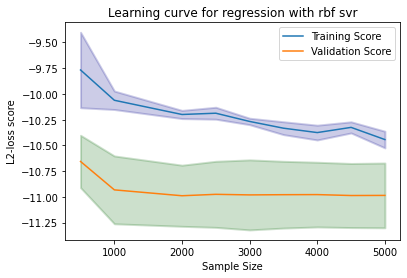

CPU times: user 45.5 s, sys: 339 ms, total: 45.8 s
Wall time: 45.7 s


In [28]:
#learning curve
#mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=.1)
ns_list=[500,1000,2000,2500,3000,3500,4000,4500,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.savefig('c=10')
plt.show()

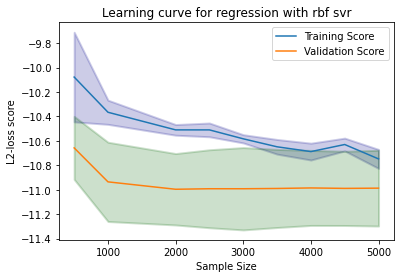

CPU times: user 46.4 s, sys: 286 ms, total: 46.6 s
Wall time: 46.5 s


In [25]:
#learning curve
#mean_squared_error
%%time

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=.1)
ns_list=[500,1000,2000,2500,3000,3500,4000,4500,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

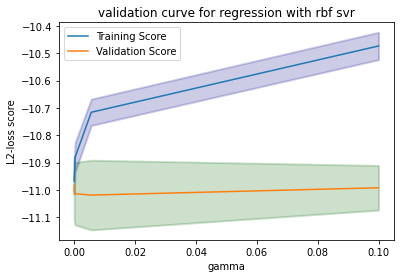

CPU times: user 56.1 s, sys: 275 ms, total: 56.4 s
Wall time: 56.3 s


In [12]:
#validation curve
#mean_squared_error
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, epsilon=.1)
param_range = np.logspace(-6, -1, 5)
train_scores, valid_scores = validation_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                    cv = 5,param_name="gamma", param_range=param_range,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = 'L2-loss score'

plt_title = 'validation curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, train_scores_mean, label = 'Training Score')
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

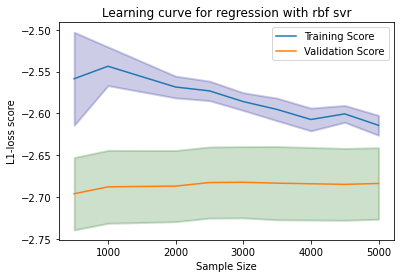

CPU times: user 44.3 s, sys: 253 ms, total: 44.5 s
Wall time: 44.5 s


In [30]:
##learning curve
##mean_absolute_error
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.01, epsilon=.1)
ns_list=[500,1000,2000,2500,3000,3500,4000,4500,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_absolute_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L1-loss score'

plt_title = 'Learning curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()

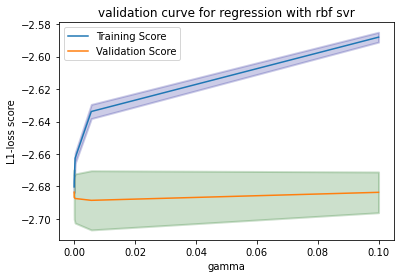

CPU times: user 55.9 s, sys: 246 ms, total: 56.1 s
Wall time: 56 s


In [13]:
##validation curve
##mean_absolute_error
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, epsilon=.1)
param_range = np.logspace(-6, -1, 5)
train_scores, valid_scores = validation_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                    cv = 5,param_name="gamma", param_range=param_range,
                                                   scoring = 'neg_mean_absolute_error')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = 'L1-loss score'

plt_title = 'validation curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, train_scores_mean, label = 'Training Score')
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.savefig('svr4.jpg')
plt.show()

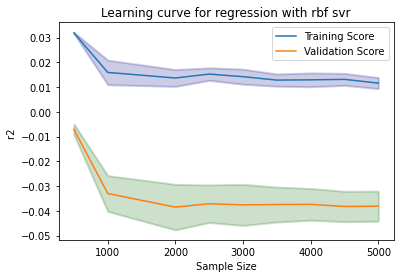

CPU times: user 46.8 s, sys: 298 ms, total: 47.1 s
Wall time: 47 s


In [32]:
#learning curve
#r2
%%time

from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=.1)
ns_list=[500,1000,2000,2500,3000,3500,4000,4500,5000]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'r2')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean =np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'r2 '

plt_title = 'Learning curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, valid_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.savefig('r2')
plt.show()

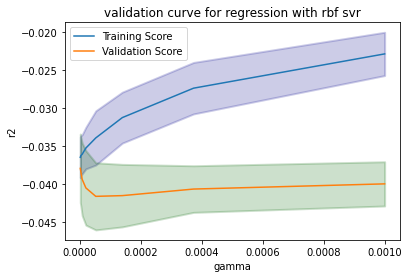

CPU times: user 1min 30s, sys: 360 ms, total: 1min 31s
Wall time: 1min 30s


In [14]:
###validation curve
###r2
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR
svr_rbf = SVR(kernel='rbf', C=0.1, epsilon=.1)
param_range = np.logspace(-6, -3, 8)
train_scores, valid_scores = validation_curve(
                                                   estimator = svr_rbf, 
                                                   X = X_train, y = Y_train, 
                                                    cv = 5,param_name="gamma", param_range=param_range,
                                                   scoring = 'r2')

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'gamma'
ylabel = 'r2'

plt_title = 'validation curve for regression with rbf svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(param_range, train_scores_mean, label = 'Training Score')
ax.plot(param_range, valid_scores_mean, label = 'Validation Score')

plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(param_range, valid_scores_mean - valid_scores_std,
                 valid_scores_mean + valid_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.savefig('svr6.jpg')
plt.show()

In [39]:
#fit data
#min max scaler
%%time
from sklearn.preprocessing import MinMaxScaler, StandardScaler,scale
svr_rbf = SVR(kernel='rbf', C=0.1, gamma=0.1, epsilon=.1)
regr = make_pipeline(MinMaxScaler(),svr_rbf)
fit_poly=regr.fit(X_train, Y_train)

CPU times: user 2.34 s, sys: 19.9 ms, total: 2.36 s
Wall time: 2.36 s


In [40]:
#predict data
%%time

predict_rbf=regr.predict(X_test)
score_rbf=regr.score(X_test,Y_test)

CPU times: user 238 ms, sys: 2 ms, total: 240 ms
Wall time: 247 ms


**linear SVR**

In [ ]:
%%time
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm  import SVR

svr_lin = SVR(kernel='linear', C=100, gamma='auto')
ns_list=[500]
ns_list, train_scores, valid_scores = learning_curve(
                                                   estimator = svr_lin, 
                                                   X = X_train, y = Y_train, 
                                                   train_sizes = ns_list, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

train_scores_mean = - np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
valid_scores_mean = - np.mean(valid_scores, axis=1)
valid_scores_std = np.std(valid_scores, axis=1)

xlabel = 'Sample Size'
ylabel = 'L2-loss score'

plt_title = 'Learning curve for regression with linear svr'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=plt_title)
ax.plot(ns_list, train_scores_mean, label = 'Training Score')
ax.plot(ns_list, validation_scores_mean, label = 'Validation Score')

plt.fill_between(ns_list, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkblue", lw=2)
plt.fill_between(ns_list, validation_scores_mean - validation_scores_std,
                 validation_scores_mean + validation_scores_std, alpha=0.2,
                 color="darkgreen", lw=2)


ax.legend(loc=0)
plt.show()